## Lesson 10:
### Exercise 0: Computing $\pi$ numerically


In [9]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

  0%|          | 0/1000 [00:00<?, ?it/s]

1000 782
Pi = 3.128


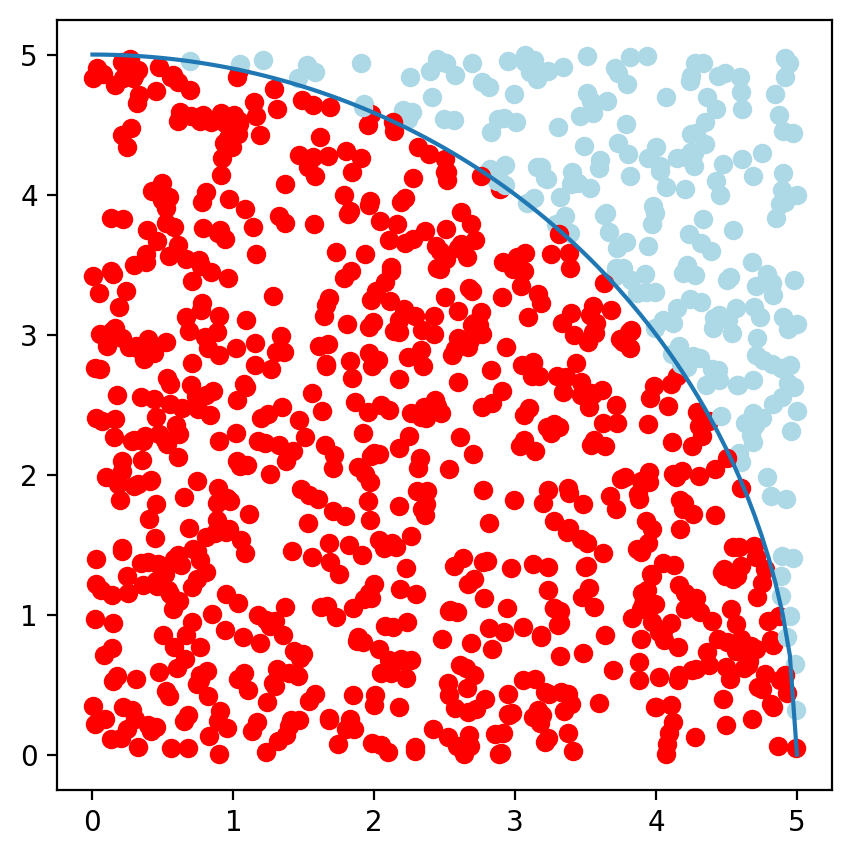

In [12]:
def quarter_circle(x, r):
    return np.sqrt(r**2 - x**2)

fig, ax = plt.subplots(figsize=(5,5))
r = 5
xgrid = np.linspace(0, r, 100)
ycircle = quarter_circle(xgrid, r)
plt.plot(xgrid, ycircle)

N_count = 0
N_sample = 1000
for n in tqdm(np.arange(0, N_sample)):
    x = r*np.random.random()
    y = r*np.random.random()
    if y < quarter_circle(x, r):
        N_count += 1
        plt.scatter(x, y, c='red')
    else:
        plt.scatter(x, y, c='lightblue')

print(N_sample, N_count)
print('Pi =', N_count/N_sample * 4)